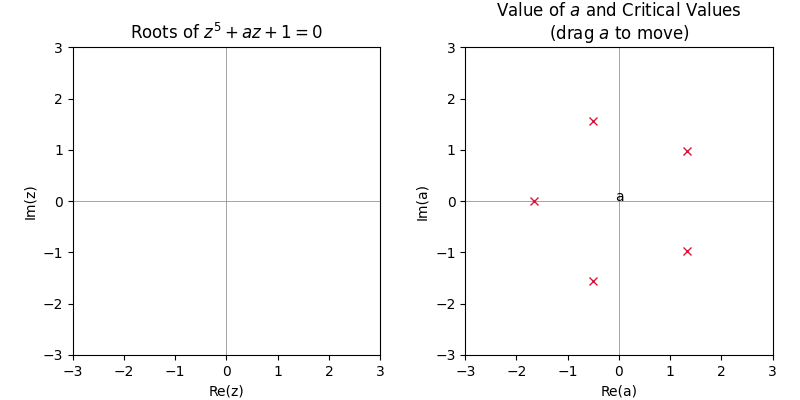

In [13]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
import cmath

# ——— Global state ———
last_roots = None
colors = ['red', 'green', 'blue', 'orange', 'purple']
clicked_a = None
dragging = False

# ——— Parameters ———
epsilon = 0.2
a_mag   = 5 * (1/4)**(4/5)
a0      = 0
critical_as = [ -a_mag * cmath.exp(2j * np.pi * 8 * k / 5)
                for k in range(5) ]

# ——— Helpers ———
def compute_roots(a):
    return np.roots([1, 0, 0, 0, a, 1])

def match_roots(old_roots, new_roots):
    cost = np.abs(old_roots[:,None] - new_roots[None,:])
    i,j  = linear_sum_assignment(cost)
    return new_roots[j]

# ——— Figure setup ———
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.canvas.toolbar_visible = False

# Left: root‐plane
for ax in (ax1, ax2):
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')

ax1.set_title("Roots of $z^5 + az + 1 = 0$")
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
root_points = [ax1.plot([], [], 'o', color=colors[i])[0] for i in range(5)]
root_labels = [ax1.text(0, 0, '', ha='center', color=colors[i])
               for i in range(5)]

# Right: a‐plane
ax2.set_title("Value of $a$ and Critical Values\n(drag $a$ to move)")
ax2.set_xlabel('Re(a)')
ax2.set_ylabel('Im(a)')
for ca in critical_as:
    ax2.plot(ca.real, ca.imag, 'x', color='crimson')

a_point, = ax2.plot([], [], 'ko')
a_label  = ax2.text(0, 0, 'a', ha='center')

plt.tight_layout()
plt.show()

# ——— Update routine ———
def update_plot():
    global last_roots

    # pick a: either the dragged position, or default on the positive real offset
    if clicked_a is not None:
        a = clicked_a
    else:
        a = a0  # same as epsilon * exp(1j*0)

    # compute & match roots
    roots = compute_roots(a)
    if last_roots is not None:
        roots = match_roots(last_roots, roots)
    last_roots = roots

    # redraw roots
    for i, z in enumerate(roots):
        root_points[i].set_data([z.real], [z.imag])
        root_labels[i].set_position((z.real, z.imag + 0.15))
        root_labels[i].set_text(f'{i+1}')

    # redraw a
    a_point.set_data([a.real], [a.imag])
    a_label.set_position((a.real, a.imag + 0.1))

    fig.canvas.draw_idle()

# ——— Mouse callbacks ———
def on_press(event):
    global dragging
    if event.inaxes == ax2 and a_point.contains(event)[0]:
        dragging = True

def on_motion(event):
    global clicked_a
    if dragging and event.inaxes == ax2 and event.xdata is not None:
        clicked_a = complex(event.xdata, event.ydata)
        update_plot()

def on_release(event):
    global dragging
    dragging = False

fig.canvas.mpl_connect('button_press_event',   on_press)
fig.canvas.mpl_connect('motion_notify_event',  on_motion)
fig.canvas.mpl_connect('button_release_event', on_release)

# ——— Kick it off ———
update_plot()
